In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import os

for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\umairansari\Desktop\New folder (2)\Dataset\base_submisson.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\base_submisson_with_fe_dt_time.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\pet adoption base submission(2).ipynb
C:\Users\umairansari\Desktop\New folder (2)\Dataset\pet adoption feature engineering.ipynb
C:\Users\umairansari\Desktop\New folder (2)\Dataset\pet adoption with oversampling.ipynb
C:\Users\umairansari\Desktop\New folder (2)\Dataset\pets classification with multiple models.ipynb
C:\Users\umairansari\Desktop\New folder (2)\Dataset\results.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\submission_multiple_CatBoostClassifiersubmission.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\submission_multiple_smoteAdaBoostClassifiersubmission.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\submission_multiple_smoteBaggingClassifiersubmission.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\submission_multiple_smoteDecision

In [11]:
train=pd.read_csv("train_mod.csv")
test=pd.read_csv("test_mod.csv")

#label encoding the features for the modelling process
le=LabelEncoder()
le.fit(train["color_type"])
# train["color_type"]=le.fit_transform(train["color_type"])
train["color_type"]=le.transform(train["color_type"])
test["color_type"]=le.transform(test["color_type"])


train.shape,test.shape

((18834, 15), (8072, 13))

In [49]:
train.iloc[4000:4050].head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days_stayed,total_days_stayed,total_hours_stayed,condition_is_missing,fe_ids,len_in_cm,X1_X2,Area_occupied
4000,ANSL_50935,2004-07-11 00:00:00,2016-07-31 13:09:00,2.0,15,0.56,12.20,0,7,0.0,2,4403 days 13:09:00.000000000,4403,13.15,0,50935,56.0,0,683.20
4001,ANSL_61969,2016-04-03 00:00:00,2017-05-25 14:39:00,0.0,53,0.61,40.66,0,1,1.0,2,417 days 14:39:00.000000000,417,14.65,0,61969,61.0,0,2480.26
4002,ANSL_54918,2015-12-31 00:00:00,2018-02-02 16:23:00,1.0,2,0.03,6.33,0,1,0.0,2,764 days 16:23:00.000000000,764,16.38,0,54918,3.0,0,18.99
4003,ANSL_51148,2014-05-30 00:00:00,2017-06-24 12:21:00,2.0,2,0.12,44.97,13,9,1.0,2,1121 days 12:21:00.000000000,1121,12.35,0,51148,12.0,117,539.64
4004,ANSL_61173,2011-06-25 00:00:00,2017-07-15 16:23:00,1.0,2,0.22,37.54,0,7,0.0,2,2212 days 16:23:00.000000000,2212,16.38,0,61173,22.0,0,825.88


In [21]:
train["fe_ids"]=train["pet_id"].str.replace("ANSL_","").astype("int")
test["fe_ids"]=test["pet_id"].str.replace("ANSL_","").astype("int")

# train["fe_ids"]=pd.to_numeric(train["pet_id"],errors="coerce")
# test["fe_ids"]=pd.to_numeric(test["pet_id"],errors="coerce")

train["len_in_cm"]=train["length(m)"]*100
test["len_in_cm"]=test["length(m)"]*100


train["X1_X2"]=train["X1"]*train["X2"]
test["X1_X2"]=test["length(m)"]*test["X2"]


train["Area_occupied"]=train["len_in_cm"]*train["height(cm)"]
test["Area_occupied"]=test["len_in_cm"]*test["height(cm)"]

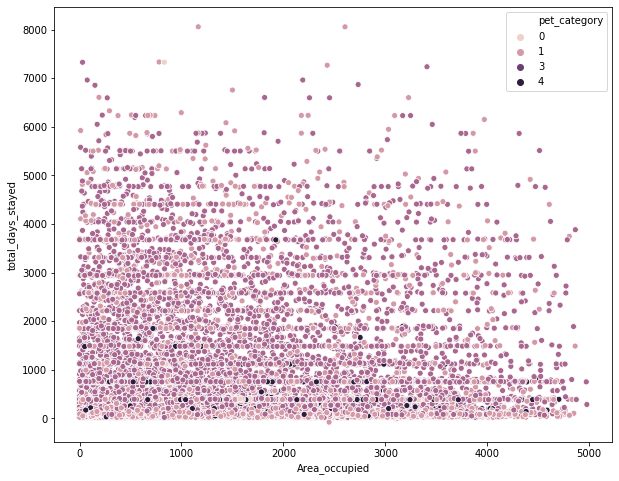

In [51]:
plt.figure(figsize=(10,8))
sns.scatterplot(train["Area_occupied"],train["total_days_stayed"],hue=train["pet_category"])

In [56]:
train.groupby("pet_category").sum()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,total_days_stayed,total_hours_stayed,condition_is_missing,fe_ids,len_in_cm,X1_X2,Area_occupied
pet_category,,,,,,,,,,,,,,
0,23.0,2613,50.32,2257.67,574,317,109.0,42167,1158.42,51,5634837,5032.0,2922,128238.41
1,5649.0,155713,3625.55,198116.46,54315,34002,4572.0,4143452,103549.18,583,454446391,362555.0,400079,10022392.62
2,8736.0,285078,5312.20,290289.73,34666,47873,4989.0,11460083,159426.79,60,675002319,531220.0,261618,14496536.69
4,-552.0,19169,478.57,26307.45,11576,4017,1641.0,463146,12055.12,783,59274224,47857.0,52746,1306054.80


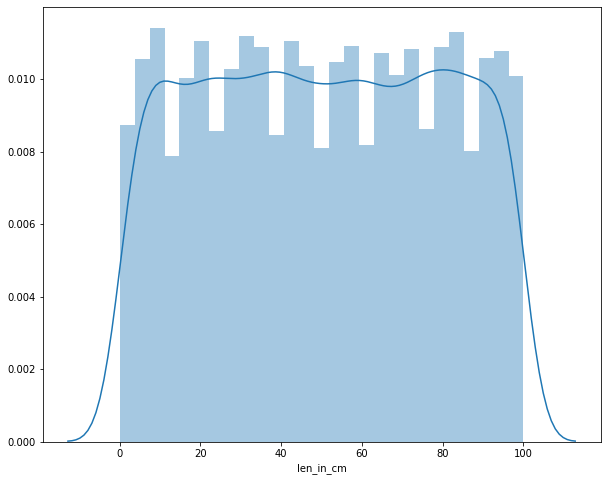

In [57]:
plt.figure(figsize=(10,8))
sns.distplot(train["len_in_cm"])

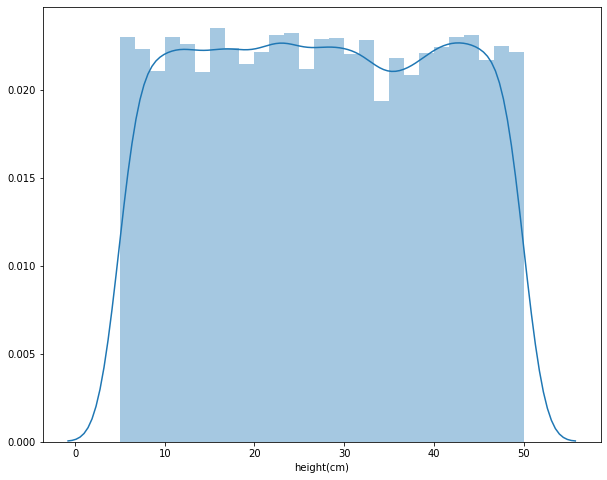

In [45]:
plt.figure(figsize=(10,8))
sns.distplot(train["height(cm)"])

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 16 columns):
pet_id                  18834 non-null object
issue_date              18834 non-null object
listing_date            18834 non-null object
condition               18834 non-null float64
color_type              18834 non-null int32
length(m)               18834 non-null float64
height(cm)              18834 non-null float64
X1                      18834 non-null int64
X2                      18834 non-null int64
breed_category          18834 non-null float64
pet_category            18834 non-null int64
days_stayed             18834 non-null object
total_days_stayed       18834 non-null int64
total_hours_stayed      18834 non-null float64
condition_is_missing    18834 non-null int64
fe_ids                  18834 non-null int32
dtypes: float64(5), int32(2), int64(5), object(4)
memory usage: 2.2+ MB


In [60]:
train.to_csv("train_feature_engineered.csv",index=False)
test.to_csv("test_feature_engineered.csv",index=False)